Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
16/10/2018
</small></small></p>

## Cálculo Simbólico

A diferencia del cálculo numérico, que siempre evalúa completamente las expresiones matemáticas, las herramientas de [cálculo simbólico](https://en.wikipedia.org/wiki/Computer_algebra) son capaces de manipular las expresiones propiamente dichas, sin evaluar, con ciertas reglas de transformación. Esto permite simplificar ecuaciones, despejar variables, obtener integrales indefinidas, etc. Para abordar este tipo de tareas existen sistemas de cálculo simbólico muy potentes como *Mathematica* (*Wolfram Alpha*), *Maple* (comerciales) y [Maxima](http://maxima.sourceforge.net/) (libre).

En este capítulo se presenta brevemente el paquete [sympy](http://www.sympy.org/en/index.html) incluido en el ecosistema científico de Python. No es tan completo como los anteriores pero permite resolver una amplia variedad de problemas de este tipo y puede combinarse fácilmente con las demás herramientas de programación del lenguaje.

### Símbolos y expresiones simbólicas

Lo más importante que hay que tener en cuenta para usar este paquete es que las expresiones matemáticas son un tipo de dato nuevo, que se construye a partir de "símbolos", con funciones matemáticas simbólicas que importamos de `sympy` (no de `math` o `numpy`).

Para mayor legibilidad importamos las funciones matemáticas más utilizadas y activamos la opción de *pretty printing*.

In [1]:
import sympy as sym

from sympy import sin, cos, exp, sqrt
from sympy import pi, oo
from sympy import symbols, N
from sympy.abc import alpha, beta

sym.init_printing(pretty_print=True)

In [2]:
x     = sym.Symbol('x')
delta = sym.Symbol('delta')

La variable de Python `x` contiene la expresión matemática $x$, un único símbolo. Lo mismo ocurre con el nombre `delta`, al que asignamos el símbolo matemático $\delta$. La opción de *pretty printing* muestra en el notebook los símbolos con la notación matemática habitual.

In [3]:
pi * x + delta

Las operaciones matemáticas construyen expresiones simbólicas que no se evalúan (aunque algunas simplificaciones obvias se aplican automáticamente) y se pueden guardar en variables de Python.

In [4]:
cosa = sin(5*x+x-beta)

In [5]:
cosa

Las herramientas de cálculo simbólico manipulan este tipo de expresiones mediante reglas de transformación matemáticamente válidas. 

In [6]:
cosa**2 * 5 * cosa

Para que esto sea posible, las expresiones se representan internamente mediante estructuras especiales. Podemos consultarlas por curiosidad, aunque en la práctica no tenemos que preocuparnos por ellas.

In [7]:
sym.srepr(cosa)

"Mul(Integer(-1), sin(Add(Symbol('beta'), Mul(Integer(-1), Integer(6), Symbol('x')))))"

### Derivadas

La derivación de funciones es una de las tareas mejor resueltas mediante el cálculo simbólico, ya que es un proceso puramente mecánico.

In [8]:
sym.diff( sin(cos(x)) , x )

In [9]:
f = sin(x**2)

sym.diff(f,x,2)

Muchas funciones de `sympy` pueden aplicarse de forma normal, o como "métodos":

In [10]:
f.diff(x,2)

Esta forma permite encadenar operaciones de forma cómoda:

In [11]:
g = sin(2*x)*exp(cos(x))

g

In [12]:
g.diff(x,3)

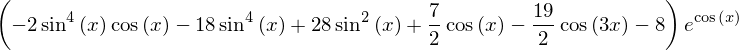

In [13]:
g.diff(x,3).simplify()

### Integrales

La integración simbólica es más complicada, ya que no todas las funciones tienen una primitiva que se pueda expresar con funciones elementales.

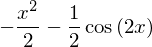

In [14]:
sym.integrate( sin(2*x)-x , x)

In [15]:
sym.integrate( 1/(1+x**2) , x)

In [16]:
sym.integrate( 1/(1+x**2) , (x,0,1))

Observa que el resultado es exacto, expresado en función del símbolo `pi`, que representa el verdadero número $\pi$ matemático con todas sus propiedades:

In [17]:
sin(pi)

Veamos otros ejemplos:

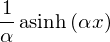

In [18]:
sym.integrate( 1/sqrt(1 + alpha**2 * x**2) , x)

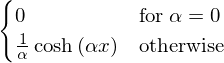

In [19]:
sym.integrate( sym.sinh(x*alpha) , x)

In [20]:
f = sin(x**2)

f

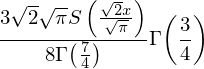

In [21]:
f.integrate(x)

El resultado viene dado en función de la función gamma, y de una función especial $S$. Si imprimimos el resultado "de forma informática" obtenemos más información:

In [22]:
print(f.integrate(x))

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))


Se trata de la [integral de Fresnel](https://en.wikipedia.org/wiki/Fresnel_integral).

### Cuidado

Diferencia entre la función predefinida y el símbolo genérico:

In [23]:
gamma = symbols('gamma')
gamma

In [24]:
sym.gamma

gamma

In [25]:
gamma(4), gamma(x)

In [26]:
sym.gamma(4),  sym.gamma(x)

### Propiedades

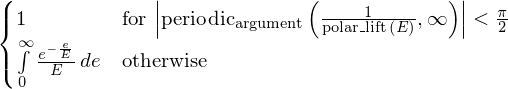

In [27]:
e, E = sym.symbols('e E')

sym.integrate( 1/E * exp(-e/E) , (e,0,sym.oo))

Para evitar resultados demasiado generales a veces es conveniente dar propiedades a los símbolos:

In [28]:
e, E = sym.symbols('e E',positive=True)

sym.integrate( 1/E * exp(-e/E) , (e,0,oo))

In [29]:
sym.integrate( e* 1/E * exp(-e/E) , (e,0,oo))

In [30]:
sym.integrate( 2/sqrt(pi*E**3) * sqrt(e) * exp(-e/E) ,(e,0,oo))

In [31]:
sym.integrate( e *  2/sqrt(pi*E**3) * sqrt(e) * exp(-e/E) ,(e,0,oo))

### Simplificación

In [32]:
cos(2*x+x)

In [33]:
sym.simplify( sin(3*x)**2+cos(2*x+x)**2 )

In [34]:
sym.expand( (x+3)**5 )

In [35]:
sym.expand( (x-1)*(x+2)*(x-3) )

In [36]:
sym.factor( x**5-1 )

In [37]:
sym.expand( sin(3*x) , trig=True)

### Sustitución

In [38]:
x,y = sym.symbols('x y')

cosa = 2*x+y

In [39]:
cosa.subs({x: y+1})

In [40]:
(sin(2*x)).subs({sin: exp , x: y**2})

### Evaluación numérica

Las expresiones simbólicas no son funciones normales de Python definidas con `def`, pero en cierto sentido podemos evaluarlas, dando valores numéricos a todos los símbolos.

In [41]:
cosa = sin(2*x)

In [42]:
cosa.evalf(subs={x:0.6})

In [43]:
f

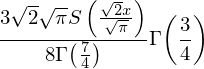

In [44]:
sym.integrate(f,x)

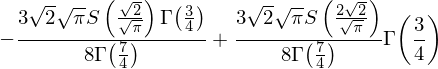

In [45]:
sym.integrate(f,(x,1,2))

In [46]:
N(sym.integrate(f,(x,1,2)))

In [47]:
N(sqrt(2),100)

In [48]:
N(pi**2,1000)

### Conversión de expresiones en funciones numéricas

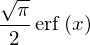

In [49]:
f = sym.integrate(exp(-x**2),x)
f

In [50]:
f.evalf(subs={x:2})

In [51]:
g = sym.lambdify(x,f,"math")

In [52]:
g(2)

In [53]:
import scipy.special

h = sym.lambdify(x, f, ['numpy',  {'erf':scipy.special.erf}])

In [54]:
h([2,3])

array([0.88208139, 0.88620735])

### Solución de ecuaciones

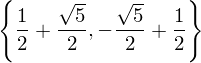

In [55]:
sym.solveset( 1+x-x**2 , x)

In [56]:
sym.solveset( x**3-2*x**2-5*x+6 , x)

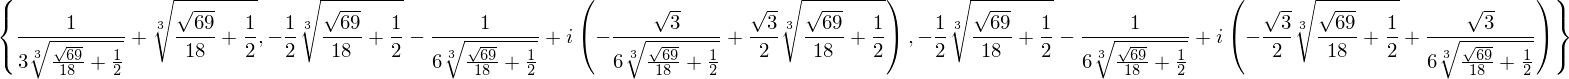

In [57]:
sym.solveset( 1+x-x**3 , x)

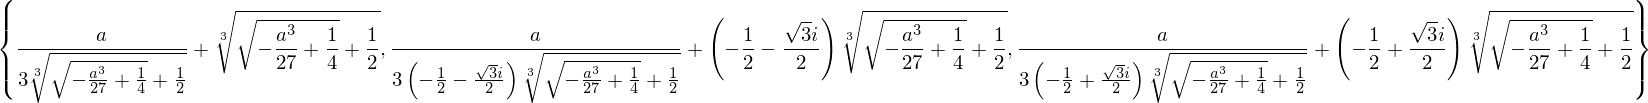

In [58]:
a = symbols('a')

sym.solveset( 1+a*x-x**3 , x)

In [59]:
[N(s) for s in sym.solveset(1+x-x**3,x)]

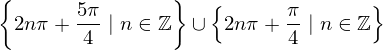

In [60]:
sym.solveset( cos(x)-sin(x) , x)

In [61]:
sym.solveset(cos(x)-x**2,x)

### Límites

In [62]:
sym.limit( x / (5 + 2*x) , x, oo)

In [63]:
sym.limit( (1+ 3/x)**x , x , oo )

### Series

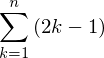

In [64]:
k, n = symbols('k n')

S = sym.Sum( 2*k-1, (k, 1, n))

S

In [65]:
S.doit()

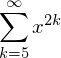

In [66]:
s = sym.Sum( (x**k)**2, (k,5,oo))
s

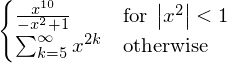

In [67]:
s.doit()

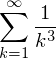

In [68]:
S = sym.Sum(1/k**3, (k,1,oo))
S

In [69]:
S.doit()

(Es la [Zeta de Riemann](https://en.wikipedia.org/wiki/Riemann_zeta_function).)

### Ecuaciones diferenciales

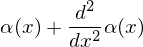

In [70]:
eq = sym.diff(alpha(x),x,2)+alpha(x)

eq

In [71]:
sym.dsolve( eq , alpha(x))

Las ecuaciones en derivadas parciales por ahora solo admiten dos variables y ecuaciones de tipos sencillo.

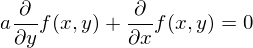

In [72]:
f,x,y,a = symbols('f x y a')
eq = sym.Eq(sym.diff(f(x,y),x) + a*sym.diff(f(x,y),y),0)
eq

In [73]:
sym.pdsolve(eq)

### series de Taylor

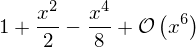

In [74]:
sym.series(sqrt(1+x**2),x,0,6)

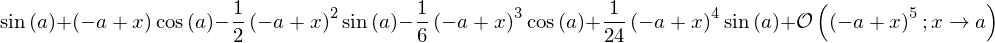

In [75]:
sym.series(sin(x),x,a,5)

### Operaciones matriciales

In [76]:
a,b,c = symbols('a b c')

m = sym.Matrix( [[a,b],[b,c]] )

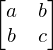

In [77]:
m

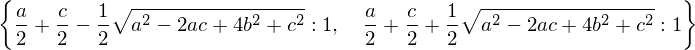

In [78]:
m.eigenvals()


### Lógica

In [79]:
p,q,r = symbols('p q r')

In [80]:
formula = ((p >> q) & (p >> ~q)) >> ~p
formula

In [81]:
sym.simplify_logic(formula)

In [82]:
sym.satisfiable(p >> ~p)

{p: False}

### Caso de estudio: desarrollo de Taylor

Definimos nuestra propia función para calcular un desarrollo de Taylor y convertirlo en función numérica que admite arrays.

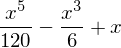

In [83]:
def Taylor(f,x,a,n):
    def fn(k):
        return f.diff(x,k).subs({x:a}).simplify()
    return sum([((x-a)**k / sym.factorial(k)* fn(k)).simplify() for k in range(n+1)])

Taylor( sin(x), x, 0, 5 )

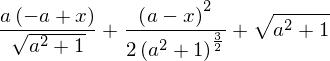

In [84]:
Taylor( sqrt(1+x**2) , x, a, 2)

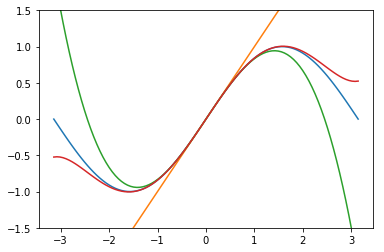

In [85]:
f = sin(x)

def g(n):
    fun = sym.lambdify(x,Taylor(f,x,0,n),'numpy')
    return fun


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-np.pi,np.pi,100)
plt.ylim(-1.5,1.5)
plt.plot(X,np.sin(X),X,g(1)(X),X,g(3)(X), X, g(5)(X));

### plot

`sympy` tiene una función `plot` que admite directamente expresiones simbólicas.

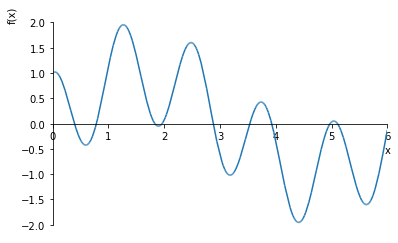

In [86]:
sym.plot( sin(x)+cos(5*x) , (x,0,6));

### Caso de estudio: integral de Riemann

Vamos a calcular la integral definida de una función mediante la suma de un número *infinito* de rectángulos ([integral de Riemann](https://en.wikipedia.org/wiki/Riemann_integral)).

In [87]:
x,y,z,a,b,n,k = symbols('x y z a b n k')

In [88]:
def f(x):
    return x**2

En primer lugar comprobamos el resultado que deseamos obtener.

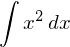

In [89]:
I = sym.Integral(f(x),x)
I

In [90]:
I.doit()

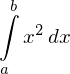

In [91]:
I = sym.Integral(f(x),(x,a,b))
I

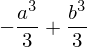

In [92]:
I.doit()

Definimos la integral como una suma de $n$ rectángulos, de ancho $h$. Aunque $n$ no está especificado, la suma se puede obtener de forma cerrada (gracias a que $f$ es sencilla) y pasar al límite.

In [93]:
h = (b-a)/n

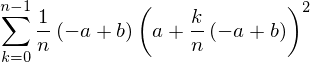

In [94]:
S = sym.Sum( h*f(a+k*h), (k,0,n-1))
S

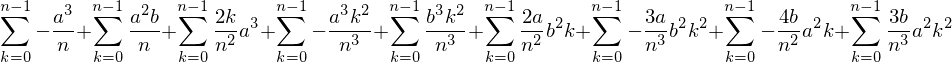

In [95]:
S.expand()

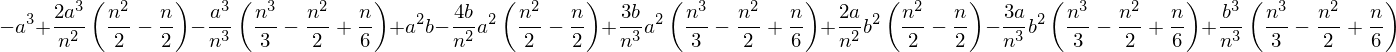

In [96]:
S.doit()

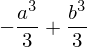

In [97]:
sym.Limit(S,n,oo).doit()

### Caso de estudio: teorema de Cayley-Hamilton

Una matriz es raíz de su polinomio característico ([Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley%E2%80%93Hamilton_theorem)).

In [98]:
x,a = symbols('x a')

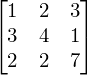

In [99]:
m = sym.Matrix( [[1,2,3],[3,4,1],[2,2,7]] )
m

In [100]:
I = sym.eye(m.shape[0])

p = sym.det(m-a*I).simplify()
p

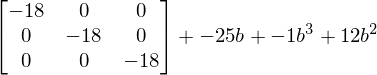

In [101]:
b = sym.MatrixSymbol('b',3,3)

q = (-b**3+12*b**2-25*b-18*I)
q

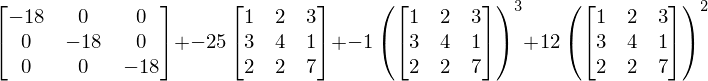

In [102]:
q.subs({b:m})

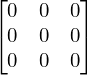

In [103]:
q.subs({b:m}).doit()

Es posible convertir automáticamente el polinomio escalar `p` en la expresión matricial `q`. Una forma de hacerlo es a través de la representación textual.

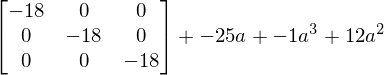

In [104]:
ti = p.subs({a:0})
sym.sympify(repr(p-ti),locals={'a':sym.MatrixSymbol('a',3,3)}) + ti*I

Extraemos el término independiente del polinomio para añadirlo como coeficiente de la matriz identidad. En `sympy` las matrices y los símbolos matriz se pueden multiplicar por escalares pero no sumar.